In [71]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from skimage import transform,data
import imageio
from collections import Counter

In [72]:
def get_files(file_dir):
    #正类
    Yes = []
    label_Yes = []
    #负类
    No = []
    label_No = []
    
    for file in os.listdir(file_dir+'/Yes'):
        Yes.append(file_dir+'/Yes'+'/'+file)
        label_Yes.append(1)
        
    for file in os.listdir(file_dir+'/No'):
        No.append(file_dir+'/No'+'/'+file)
        label_No.append(0)
        
    #合并数据集
    image_list=np.hstack((Yes,No))
    label_list=np.hstack((label_Yes,label_No))
    
    #打乱图片顺序
    temp=np.array([image_list,label_list])
    temp=temp.transpose()
    np.random.shuffle(temp)
    
    #取出
    image_list=list(temp[:,0])
    label_list=list(temp[:,1])
    label_list=[int(i) for i in label_list]
    
    return image_list,label_list

In [73]:
image_list,label_list=get_files("/home/yee/DataSet/Animal/train/")

In [74]:
print(len(image_list))
#print(label_list)

2268


In [75]:
#test_number= 切分出来做测试集   .astype('float32')
test_number=300
Train_image=np.random.rand(len(image_list)-test_number,64,64,3).astype('float32')
Train_label=np.random.rand(len(image_list)-test_number,1).astype('float32')
Test_image=np.random.rand(test_number,64,64,3).astype('float32')
Test_label=np.random.rand(test_number,1).astype('float32')

In [76]:
print(len(Train_image))
print(len(Test_image))

1968
300


In [77]:
#print(Train_label)
#print(Test_label)

In [78]:
sum=1
j=0

for i in range(len(image_list)-test_number):
    #print(i)
    temp_image= np.array(imageio.imread(image_list[i]))
    #print(temp_image.shape,temp_image.ndim)
    if  temp_image.ndim==3:
        if temp_image.shape[2]!=4:
            Train_image[j]=transform.resize(temp_image,(64,64))
            Train_label[j] = np.array(label_list[i])
            #Train_label[i] = label_list[i]
            sum+=1
            j+=1
print(sum)
print(j-1)
j=0
for i in range(len(image_list)-test_number, len(image_list)):
    #print(i)
    temp_image=np.array(imageio.imread(image_list[i+test_number-len(image_list)]))
    #print(temp_image.shape)
    if temp_image.ndim==3:
        if temp_image.shape[2]!=4:
            Test_image[j]=transform.resize(temp_image,(64,64))
            Test_label[j] = np.array(label_list[i])
            #Test_image[i+test_number-len(image_list)]=transform.resize(temp_image,(64,64))
            #Test_label[i+test_number-len(image_list)] = np.array(label_list[i])
            #Test_label[i+test_number-len(image_list)] = label_list[i]
            sum+=1
            j+=1
print(sum)
print(j-1)

1939
1937
2237
297


In [79]:
#print(Test_label)
Train_image.resize(1937,64,64,3)
Train_label.resize(1937,1)

In [80]:
Test_image.resize(296,64,64,3)
Test_label.resize(296,1)

In [81]:
print(len(Train_label))

1937


In [82]:
f=h5py.File('Train_Set_cat.h5','w')
f.create_dataset('train_set_x',data=Train_image)
f.create_dataset('train_set_y',data=Train_label)
f.close()

In [83]:
f=h5py.File('Test_Set_cat.h5','w')
f.create_dataset('test_set_x',data=Test_image)
f.create_dataset('test_set_y',data=Test_label)
f.close()

In [84]:
#print(Counter(Train_label[0]))
#print(Train_image[2])

(1937, 64, 64, 3)
[1.]


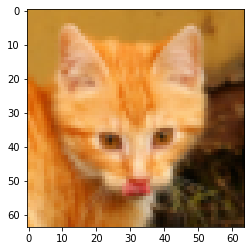

In [92]:
Train_dataset=h5py.File('Train_Set_cat.h5','r')
T_X=np.array(Train_dataset['train_set_x'][:])
T_y=np.array(Train_dataset['train_set_y'][:])
print(T_X.shape)
index=147
print(T_y[index])
plt.imshow(T_X[index])

(1937, 64, 64, 3)
[1.]


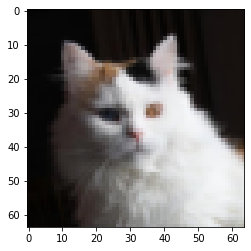

In [88]:
Train_dataset=h5py.File('Train_Set_cat.h5','r')
T_X=np.array(Train_dataset['train_set_x'][:])
T_y=np.array(Train_dataset['train_set_y'][:])
print(T_X.shape)
index=101
print(T_y[index])
plt.imshow(T_X[index])

In [20]:
temp_image= np.array(imageio.imread("/home/yee/DataSet/1.jpg"))
image=transform.resize(temp_image,(64,64))

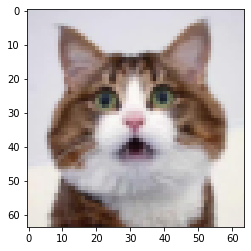

In [21]:
plt.imshow(image)

In [22]:
red=image.copy()
green=image.copy()
blue=image.copy()
red[:,:,1:3]=0
green[:,:,::2]=0
blue[:,:,:2]=0

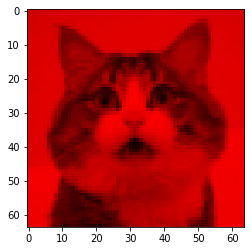

In [23]:
plt.imshow(red)

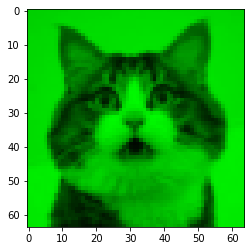

In [24]:
plt.imshow(green)

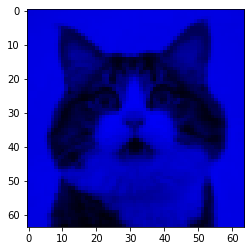

In [25]:
plt.imshow(blue)